El objetivo de este notebook no es otro que el de leer las imagenes almacenadas en el directorio 'datasets_imagenes', y preparar sus datos para entrenar el modelo de Clasificacion.



In [1]:
# Antes de continuar, debo importar una serie de librerias a utilizar
# para la manipulacion de las imagenes

import cv2
import numpy as np
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

# 1. Creacion de conjuntos de entrenamiento y prueba.

Ahora mismo, dispongo de las imagenes en los directorios pertinentes.

Para poder alimentar al modelo con las imagenes, es necesario cargarlas en memoria como matrices de Numpy, y generar tambien las etiquetas de las imagenes.

In [2]:
total = 0

for carpeta in os.listdir('datasets_animales/'):
    
    total += len(os.listdir(os.path.join('datasets_animales/', carpeta)))
    
else:
    print('Existen un total de {} imagenes.'.format(total))

Existen un total de 26179 imagenes.


In [3]:
# Para empezar, debo crear tantos arrays como tipos de animales que tratamos de
# clasificar.

# Una vez cree cada uno de estos arrays, debere crear un array mayor que
# contenga estos mas pequenios, concatenados unos con otros.

directorio_imagenes = 'datasets_animales/'

X = []

for carpeta in tqdm(os.listdir(directorio_imagenes)):
    arrayAnimal = []  # Lista vacía a la que añadiré los datos cargados de cada imagen
    
    for imagen in os.listdir(os.path.join(directorio_imagenes, carpeta)):
        rutaImagen = os.path.join(directorio_imagenes, carpeta, imagen)
        imagenCargada = cv2.imread(rutaImagen, cv2.IMREAD_GRAYSCALE)
        
        try:
            arrayAnimal.append(imagenCargada)
        except Exception as e:
            print('Ha ocurrido un error al tratar de cargar la imagen {} ==> '.format(imagen), e)
        
    else:
        X.append(arrayAnimal)

# Concatenar las listas en un solo array de NumPy usando np.vstack
X = np.vstack([np.array(item) for item in X])

print('El conjunto de características se ha creado correctamente como un array de NumPy.')

100%|██████████| 10/10 [00:09<00:00,  1.11it/s]


El conjunto de características se ha creado correctamente como un array de NumPy.


In [4]:
X.shape

(26179, 300, 225)

In [5]:
# Ahora que tengo agrupadas las caracteristicas de las imagenes, debo crear un array que contenga las etiquetas para cada una de estas imagenes.
# Esto lo lograre de la siguiente manera:

# Creo un diccionario que mapee los diferentes animales para los que tenemos imagenes, con su correspondiente etiqueta.

contador = 1

dictAnimales = {}

for carpeta in os.listdir('datasets_animales/'):
    
    dictAnimales[carpeta] = contador, len(os.listdir(os.path.join('datasets_animales/', carpeta)))
    print('Animal {} ==> Etiqueta {}'.format(carpeta, contador))
    
    contador +=1
    
print('Se ha creado el diccionario "dictAnimales" correctamente.')

Animal butterfly ==> Etiqueta 1
Animal cat ==> Etiqueta 2
Animal chicken ==> Etiqueta 3
Animal cow ==> Etiqueta 4
Animal dog ==> Etiqueta 5
Animal elephant ==> Etiqueta 6
Animal horse ==> Etiqueta 7
Animal ragno ==> Etiqueta 8
Animal sheep ==> Etiqueta 9
Animal squirrel ==> Etiqueta 10
Se ha creado el diccionario "dictAnimales" correctamente.


In [6]:
# A continuacion, creo un array que contenga el numero de la etiqueta para cada animal, repetido tantas veces como imagenes tengo de cada animal

for clave, valor in dictAnimales.items():
    print('Animal {} ==> {} ejemplos'.format(clave, valor[-1]))

Animal butterfly ==> 2112 ejemplos
Animal cat ==> 1668 ejemplos
Animal chicken ==> 3098 ejemplos
Animal cow ==> 1866 ejemplos
Animal dog ==> 4863 ejemplos
Animal elephant ==> 1446 ejemplos
Animal horse ==> 2623 ejemplos
Animal ragno ==> 4821 ejemplos
Animal sheep ==> 1820 ejemplos
Animal squirrel ==> 1862 ejemplos


In [7]:
y = []

for clave, valor in dictAnimales.items():
    etiqueta = valor[0]
    num_ejemplos = valor[1]
    
    # Utilizar np.tile para replicar la etiqueta num_ejemplos veces
    etiquetasAnimal = np.tile(etiqueta, num_ejemplos)
    print(etiquetasAnimal)
    print(len(etiquetasAnimal))
    
    # Añadir las etiquetas al array y
    y.extend(etiquetasAnimal)

# Convertir y a un array de NumPy y redimensionarlo a (-1, 1)
y = np.array(y).astype('float32').reshape((-1, 1))


print('Conjunto de etiquetas (y) creado correctamente.')

[1 1 1 ... 1 1 1]
2112
[2 2 2 ... 2 2 2]
1668
[3 3 3 ... 3 3 3]
3098
[4 4 4 ... 4 4 4]
1866
[5 5 5 ... 5 5 5]
4863
[6 6 6 ... 6 6 6]
1446
[7 7 7 ... 7 7 7]
2623
[8 8 8 ... 8 8 8]
4821
[9 9 9 ... 9 9 9]
1820
[10 10 10 ... 10 10 10]
1862
Conjunto de etiquetas (y) creado correctamente.


In [8]:
y.shape

(26179, 1)

In [9]:
X

array([[[130, 129, 129, ..., 134, 136, 136],
        [129, 129, 129, ..., 136, 137, 138],
        [129, 129, 130, ..., 138, 138, 139],
        ...,
        [107, 108, 110, ..., 141, 141, 139],
        [108, 108, 110, ..., 141, 140, 139],
        [108, 109, 110, ..., 142, 140, 139]],

       [[124, 124, 123, ..., 134, 133, 132],
        [124, 124, 123, ..., 134, 134, 133],
        [124, 124, 123, ..., 134, 134, 134],
        ...,
        [134, 133, 133, ..., 139, 139, 139],
        [134, 133, 133, ..., 139, 139, 139],
        [134, 133, 133, ..., 139, 139, 139]],

       [[175, 170, 166, ..., 197, 198, 199],
        [173, 169, 165, ..., 196, 197, 198],
        [170, 167, 165, ..., 196, 197, 198],
        ...,
        [203, 202, 202, ..., 167, 166, 166],
        [202, 202, 202, ..., 167, 167, 166],
        [202, 202, 202, ..., 167, 167, 166]],

       ...,

       [[121, 107, 106, ..., 231, 226, 228],
        [117, 105, 105, ..., 230, 223, 225],
        [112, 101, 102, ..., 229, 220, 220

In [10]:
# Los valores de los pixeles para cada imagen del array X pueden contener valor entre 1 y 255 (negro-blanco).
# Es conveniente normalizar estos valores, para facilitar el trabajo de aprendizaje del modelo.

try:
    X = np.array(X).astype('float32') / 255
    print('Los datos de las imagenes han sido normalizados con exito.')
    
except Exception as e:
    print('Ha ocurrido un error al tratar de normalizar los datos de las imagenes.')

Los datos de las imagenes han sido normalizados con exito.


In [11]:
# Muestro el array X, ahora con su contenido normalizado.
X

array([[[0.50980395, 0.5058824 , 0.5058824 , ..., 0.5254902 ,
         0.53333336, 0.53333336],
        [0.5058824 , 0.5058824 , 0.5058824 , ..., 0.53333336,
         0.5372549 , 0.5411765 ],
        [0.5058824 , 0.5058824 , 0.50980395, ..., 0.5411765 ,
         0.5411765 , 0.54509807],
        ...,
        [0.41960785, 0.42352942, 0.43137255, ..., 0.5529412 ,
         0.5529412 , 0.54509807],
        [0.42352942, 0.42352942, 0.43137255, ..., 0.5529412 ,
         0.54901963, 0.54509807],
        [0.42352942, 0.42745098, 0.43137255, ..., 0.5568628 ,
         0.54901963, 0.54509807]],

       [[0.4862745 , 0.4862745 , 0.48235294, ..., 0.5254902 ,
         0.52156866, 0.5176471 ],
        [0.4862745 , 0.4862745 , 0.48235294, ..., 0.5254902 ,
         0.5254902 , 0.52156866],
        [0.4862745 , 0.4862745 , 0.48235294, ..., 0.5254902 ,
         0.5254902 , 0.5254902 ],
        ...,
        [0.5254902 , 0.52156866, 0.52156866, ..., 0.54509807,
         0.54509807, 0.54509807],
        [0.5

In [12]:
# Antes de continuar, voy a importar el recolector de basura de Python, para poder liberar tanta memoria como sea posible, pues empezamos a trabajar con
# bastantes datos en memoria.

import gc
gc.collect()

0

In [ ]:
y_final = [label - 1 for label in y]  # Soluciona el error que se causaba al entrenar la red con 10 nodos de salida.

In [13]:
# A continuacion, voy a hacer uso de la libreria sklearn para crear los conjuntos de entrenamiento, prueba y validacion.
# RECORDATORIO ==> importante instalar las dependencias del archivo 'requeriments.txt'.

from sklearn.model_selection import train_test_split


# División para el conjunto de prueba (20%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y_final, test_size=0.2, random_state=42)

# División para el conjunto de entrenamiento y validación (80% del conjunto original)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.15, random_state=42)


In [14]:
# Elimino las variables X e y, puesto que ya no van a hacer falta, y permitiran liberar memoria

del X
del y
del y_final
gc.collect()

0

In [15]:
X_temp.shape

(20943, 300, 225)

In [16]:
y_temp.shape

(20943, 1)

In [17]:
X_test.shape

(5236, 300, 225)

In [18]:
y_test.shape

(5236, 1)

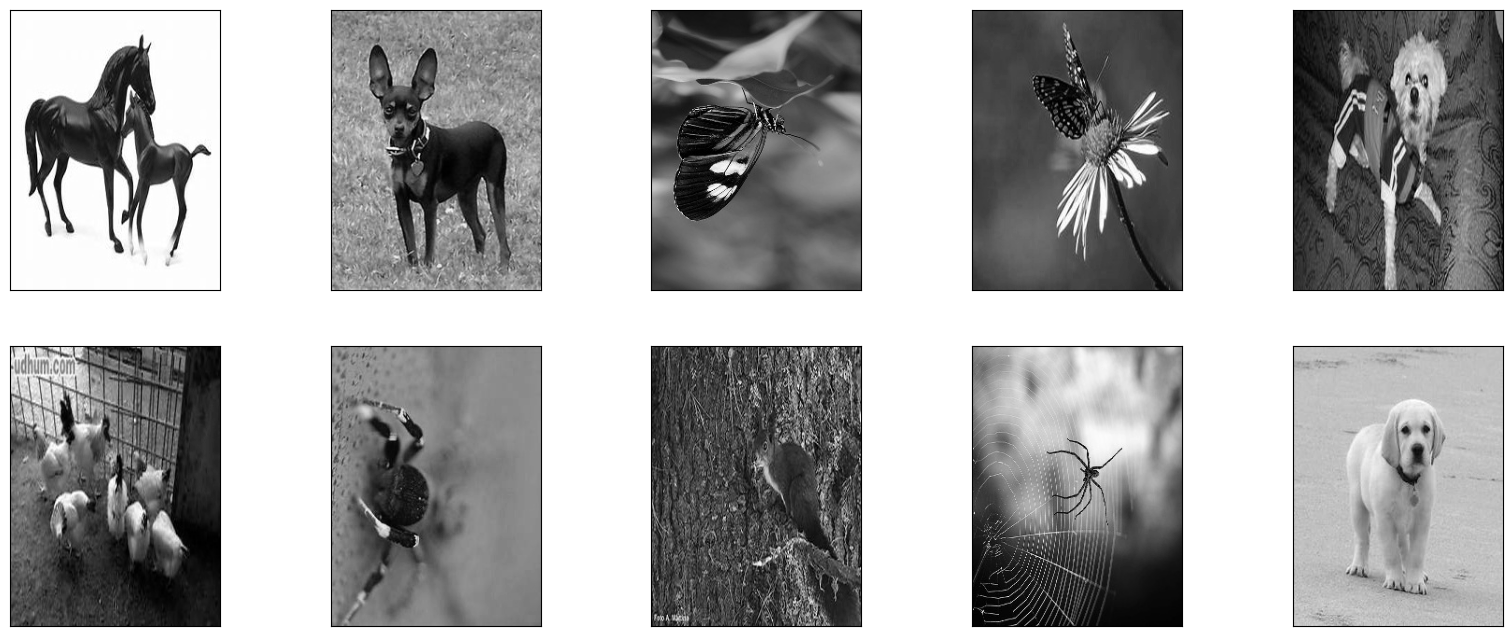

In [19]:
# Mostramos un grupo de 10 imágenes del conjunto de entrenamiento
plt.figure(figsize = (20, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap = 'gray')

In [20]:
y_train[:10]

array([[ 7.],
       [ 5.],
       [ 1.],
       [ 1.],
       [ 5.],
       [ 3.],
       [ 8.],
       [10.],
       [ 8.],
       [ 5.]], dtype=float32)

# 2. Creacion del modelo de Clasificacion

Para este proyecto, voy a entrenar una red neuronal convolucional, con el objetivo de que aprenda a clasificar imagenes de animales.


In [21]:
import tensorflow as tf

# Obtener una lista de las GPUs disponibles
gpus = tf.config.experimental.list_physical_devices('GPU')

# Si tienes varias GPUs, puedes seleccionar cuál usar
if gpus:
    try:
        # Solo utilizar la primera GPU
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "GPU física(s),", len(logical_gpus), "GPU lógica(s)")
    except RuntimeError as e:
        print(e)


In [22]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [23]:
from tensorflow.keras import models, layers

modeloCNN = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(300, 225, 1)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 neuronas para 10 tipos de etiquetas, softmax para clasificación multiclase
])

modeloCNN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [24]:
# Muestro un resumen de la arquitectura de la red neuronal.

modeloCNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 223, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 26, 128)       0

In [25]:
gc.collect()

# Entrenar el modelo en GPU
with tf.device('/GPU:0'):  # Esto asegura que el modelo se entrena en la GPU 0 si tienes varias GPU
    modeloCNN.fit(
        X_train, y_train,
        epochs = 10,
        batch_size = 32,
        validation_data = (X_val, y_val),
        steps_per_epoch = int(np.ceil(len(X_train) / float(32))),
        validation_steps = int(np.ceil(len(X_val) / float(32)))
    )

Epoch 1/10
557/557 [==============================] - 240s 430ms/step - loss: 1.8044 - accuracy: 0.3761 - val_loss: 1.5641 - val_accuracy: 0.4717
Epoch 2/10
557/557 [==============================] - 244s 438ms/step - loss: 1.1766 - accuracy: 0.6081 - val_loss: 1.2876 - val_accuracy: 0.5780
Epoch 3/10
557/557 [==============================] - 242s 435ms/step - loss: 0.6058 - accuracy: 0.7993 - val_loss: 1.5139 - val_accuracy: 0.5554
Epoch 4/10
557/557 [==============================] - 235s 423ms/step - loss: 0.2000 - accuracy: 0.9376 - val_loss: 2.0736 - val_accuracy: 0.5780
Epoch 5/10
557/557 [==============================] - 235s 422ms/step - loss: 0.0749 - accuracy: 0.9781 - val_loss: 2.7177 - val_accuracy: 0.5732
Epoch 6/10
557/557 [==============================] - 237s 426ms/step - loss: 0.0412 - accuracy: 0.9893 - val_loss: 2.9327 - val_accuracy: 0.5767
Epoch 7/10
557/557 [==============================] - 242s 435ms/step - loss: 0.0533 - accuracy: 0.9848 - val_loss: 3.3440 -

In [26]:
test_loss, test_accuracy = modeloCNN.evaluate(X_test, y_test)
print("Precisión del conjunto de prueba ==> ", test_accuracy)
print("Pérdida del conjunto de prueba ==>", test_loss)

164/164 [==============================] - 14s 88ms/step - loss: 4.0990 - accuracy: 0.5246
Precisión del conjunto de prueba ==>  0.5246371030807495
Pérdida del conjunto de prueba ==> 4.0990424156188965


In [30]:
carpetaPrueba = 'imagenes_prueba/'
class_names = [1,2,3,4,5,6,7,8,9,10]
imagenesPrueba = []

for imagen_nombre in os.listdir(carpetaPrueba):
    # Construir la ruta completa de la imagen
    imagen_ruta = os.path.join(carpetaPrueba, imagen_nombre)

    # Cargar la imagen en escala de grises y redimensionarla
    img = cv2.imread(imagen_ruta, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (225, 300))

    # Expandir las dimensiones de la imagen para que coincidan con las expectativas del modelo
    img = np.expand_dims(img, axis=-1)  # Ahora la forma será (150, 150, 1)

    img = img / 255
    imagenesPrueba.append(img)

imagenesPrueba = np.array(imagenesPrueba)

# Realizar predicciones y mostrar los resultados
for imagen in imagenesPrueba:
    # Se lanzan las imágenes contra el modelo para obtener las detecciones.
    predictions = modeloCNN.predict(np.expand_dims(imagen, axis=0))

    # Obtiene la clase predicha (la clase con la probabilidad más alta)
    clase_predicha = np.argmax(predictions, axis=1)

    # Obtiene la probabilidad de la clase predicha
    probabilidad_predicha = predictions[0][clase_predicha]

    # Muestra la clase predicha y su probabilidad
    print(f"Clase predicha: {class_names[clase_predicha[0]]}")
    print(f"Probabilidad de la clase predicha: {probabilidad_predicha:.2f}")

    plt.figure()
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[:, :, 0], cmap='gray')

    # Muestra la clase predicha en el gráfico
    plt.xlabel(f"Clase predicha: {class_names[clase_predicha[0]]}")

    plt.show()


1/1 [==============================] - 0s 20ms/step
Clase predicha: 4


TypeError: unsupported format string passed to numpy.ndarray.__format__